In [5]:
# --- 1. SETUP DAN MEMUAT DATA ---

# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk text processing dan machine learning
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  # Mengganti LogisticRegression dengan Naive Bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mengatur tampilan plot
sns.set(style='whitegrid')

# Download stopwords dari NLTK (hanya perlu dijalankan sekali)
nltk.download('stopwords')

# --- Memuat Data ---
# Ganti dengan path file CSV Anda yang benar
# Contoh jika file ada di folder yang sama: url = 'reviews.csv'
url = '../data/reviews.csv' 

# Membaca data ke dalam DataFrame pandas
# Pastikan nama kolom adalah 'review' dan 'sentiment'
try:
    df = pd.read_csv(url)
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di '{url}'. Pastikan path file sudah benar.")
    # Membuat DataFrame contoh jika file tidak ditemukan, agar sisa kode bisa jalan
    print("Membuat DataFrame contoh...")
    data = {'review': ['this movie was amazing and wonderful', 'this was a terrible and boring movie', 
                       'i absolutely loved it', 'i hated every minute of it'],
            'sentiment': ['positive', 'negative', 'positive', 'negative']}
    df = pd.DataFrame(data)


# Menampilkan 5 baris pertama data
print("Data Awal:")
print(df.head())

# Menampilkan informasi dasar tentang dataset
print("\nInfo Dataset:")
df.info()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DevonLoen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Awal:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB



Distribusi Sentimen:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


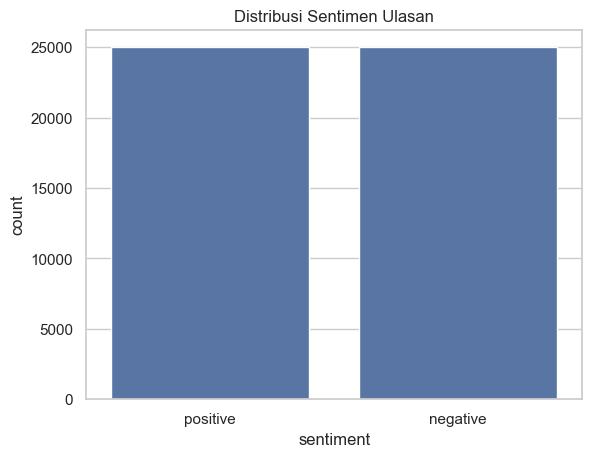


Data Setelah Preprocessing:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewers mentioned watching oz episode yo...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...  


In [6]:
# --- 2. EDA DAN PREPROCESSING TEKS ---

# Cek distribusi sentimen
print("\nDistribusi Sentimen:")
print(df['sentiment'].value_counts())

# Plot distribusi sentimen
sns.countplot(x='sentiment', data=df)
plt.title('Distribusi Sentimen Ulasan')
plt.show()

# Fungsi untuk membersihkan teks
def preprocess_text(text):
    # Mengubah ke huruf kecil
    text = text.lower()
    # Menghapus karakter selain huruf
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Menghapus stopwords
    stop_words = set(stopwords.words('english')) # Ganti ke 'indonesian' jika perlu
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Menerapkan fungsi preprocessing ke kolom 'review'
df['cleaned_review'] = df['review'].apply(preprocess_text)

print("\nData Setelah Preprocessing:")
print(df[['review', 'cleaned_review']].head())

In [7]:
# --- 3. FEATURE ENGINEERING (TF-IDF) ---

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Memisahkan fitur (X) dan target (y)
X = df['cleaned_review']
y = df['sentiment']

# Mengubah teks menjadi vektor TF-IDF
X_tfidf = tfidf.fit_transform(X)

print("\nBentuk Matriks TF-IDF:")
print(X_tfidf.shape)



Bentuk Matriks TF-IDF:
(50000, 5000)


In [8]:
# --- 4. PELATIHAN MODEL ---

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi model Naive Bayes
model = MultinomialNB()

# Melatih model dengan data latih
model.fit(X_train, y_train)

print("\nModel Naive Bayes berhasil dilatih!")



Model Naive Bayes berhasil dilatih!



Akurasi Model: 0.8542

Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      5000
    positive       0.85      0.86      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix:


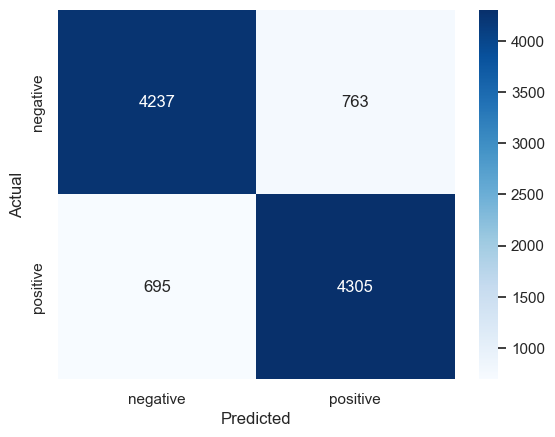

In [9]:
# --- 5. EVALUASI MODEL ---

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.4f}")

# Menampilkan classification report
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
import joblib
import os

# Tentukan direktori tujuan
output_dir = '../models'

# Buat direktori jika belum ada
# exist_ok=True berarti tidak akan ada error jika folder sudah ada
os.makedirs(output_dir, exist_ok=True)

# Tentukan path lengkap untuk model dan vectorizer
model_path = os.path.join(output_dir, 'sentiment_model.joblib')
vectorizer_path = os.path.join(output_dir, 'tfidf_vectorizer.joblib')

# --- MENYIMPAN ---
# Simpan model
joblib.dump(model, model_path)

# Simpan vectorizer (jangan lupa!)
joblib.dump(tfidf, vectorizer_path)

print(f"Model berhasil disimpan di: {model_path}")
print(f"Vectorizer berhasil disimpan di: {vectorizer_path}")

Model berhasil disimpan di: ../models\sentiment_model.joblib
Vectorizer berhasil disimpan di: ../models\tfidf_vectorizer.joblib
